In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [8]:
medicare = pd.read_csv('MUP_PHY_R23_P05_V10_D21_Geo.csv',low_memory=False)

In [9]:
medicare.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Cd,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,National,NaN,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,F,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,National,NaN,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,National,NaN,National,0003A,Fee covid-19 vac 1 booster,N,F,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [10]:
medicare.isnull().sum()

Rndrng_Prvdr_Geo_Lvl         0
Rndrng_Prvdr_Geo_Cd      13282
Rndrng_Prvdr_Geo_Desc        0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [11]:
medicare.HCPCS_Desc

0                              Adm sarscov2 30mcg/0.3ml 1st
1                              Adm sarscov2 30mcg/0.3ml 1st
2                              Adm sarscov2 30mcg/0.3ml 2nd
3                              Adm sarscov2 30mcg/0.3ml 2nd
4                                Fee covid-19 vac 1 booster
                                ...                        
271630    Annual wellness visit, includes a personalized...
271631    Face-to-face behavioral counseling for obesity...
271632         Injection, methylprednisolone acetate, 40 mg
271633         Injection, ketorolac tromethamine, per 15 mg
271634    Injection, triamcinolone acetonide, not otherw...
Name: HCPCS_Desc, Length: 271635, dtype: object

In [140]:
# medicare.Rndrng_Prvdr_Geo_Cd.value_counts(dropna=False)

In [13]:
medicare = medicare.drop("Rndrng_Prvdr_Geo_Cd", axis = 1) # drop duplicate column.

In [14]:
medicare.head()

,Rndrng_Prvdr_Geo_Lvl,Rndrng_Prvdr_Geo_Desc,HCPCS_Cd,HCPCS_Desc,HCPCS_Drug_Ind,Place_Of_Srvc,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,National,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,F,279,25735,26341.0,26341,42.415088,20.884538,20.884538,20.815810
1,National,National,0001A,Adm sarscov2 30mcg/0.3ml 1st,N,O,57563,9080086,9346114.7,9345929,44.186609,25.759089,25.759086,25.205064
2,National,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,F,187,24576,24649.0,24649,65.965120,31.794918,31.794918,31.521371
3,National,National,0002A,Adm sarscov2 30mcg/0.3ml 2nd,N,O,52326,8897346,8994332.2,8994143,53.747218,35.085090,35.085090,34.497677
4,National,National,0003A,Fee covid-19 vac 1 booster,N,F,211,5364,5371.0,5371,69.139801,38.653349,38.653349,39.183323


In [15]:
medicare_txt = medicare.HCPCS_Desc

In [17]:
medicare_txt = medicare_txt.str.lower()

In [18]:
medicare_txt.head()

0    adm sarscov2 30mcg/0.3ml 1st
1    adm sarscov2 30mcg/0.3ml 1st
2    adm sarscov2 30mcg/0.3ml 2nd
3    adm sarscov2 30mcg/0.3ml 2nd
4      fee covid-19 vac 1 booster
Name: HCPCS_Desc, dtype: object

In [24]:
import re

In [27]:
def clean_txt(text):
    return ' '.join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])", " ",text).split())

In [28]:
medicare_txt = [str(clean_txt(x)) for x in medicare_txt]

In [30]:
medicare_txt = pd.DataFrame(medicare_txt, columns=["HCPCS_Desc"])

In [32]:
medicare_txt.head()

,HCPCS_Desc
0,adm sarscov mcg ml st
1,adm sarscov mcg ml st
2,adm sarscov mcg ml nd
3,adm sarscov mcg ml nd
4,fee covid vac booster


In [33]:
import nltk
from nltk.corpus import stopwords

In [34]:
stop_words = set(stopwords.words("english"))

In [35]:
medicar_words = medicare_txt.HCPCS_Desc.str.split()

In [37]:
from wordcloud import WordCloud

In [39]:
wordcloud = WordCloud(width = 1000, height=500, stopwords=stop_words).generate(str(medicar_words))

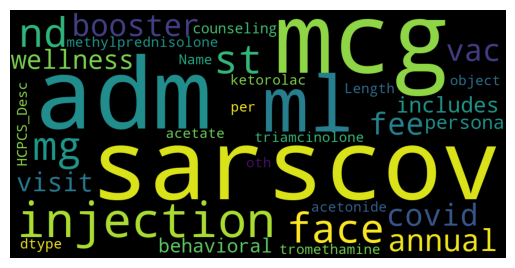

In [56]:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [42]:
medicar_words = medicar_words.map(' '.join)

In [47]:
medicar_words = [word for word in medicar_words if word]

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tfidf = TfidfVectorizer(max_features=300, stop_words='english',ngram_range=(2,2))

In [54]:
nlp_tfidf = tfidf.fit_transform(medicar_words)

In [58]:
nlp_tfidf = pd.DataFrame(nlp_tfidf.toarray(),columns = tfidf.vocabulary_)

In [60]:
nlp_tfidf.head()

,anesthesia procedure,using endoscope,soft tissue,gene analysis,ray imaging,blood vessel,brain spinal,spinal cord,needle biopsy,blood vessels,...,visit total,total time,time minutes,inpatient care,facility visit,visit typically,care management,management services,calendar month,home health
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
numcols = medicare.select_dtypes(include = np.number)
objcols = medicare.select_dtypes(include = ['object'])

In [65]:
objcols = objcols.drop('HCPCS_Cd',axis = 1)

In [ ]:
objcols = objcols.drop('HCPCS_Desc', axis = 1)

In [66]:
for col in objcols.columns:
    freq = objcols[col].value_counts(dropna=False)
    print(freq)

State       258353
National     13282
Name: Rndrng_Prvdr_Geo_Lvl, dtype: int64
National                              13282
California                             9003
Florida                                8413
Texas                                  8202
New York                               7774
                                      ...  
Armed Forces Europe                     195
Armed Forces Pacific                    175
Armed Forces Central/South America      141
Northern Mariana Islands                104
American Samoa                            3
Name: Rndrng_Prvdr_Geo_Desc, Length: 62, dtype: int64
N    259057
Y     12578
Name: HCPCS_Drug_Ind, dtype: int64
F    144227
O    127408
Name: Place_Of_Srvc, dtype: int64


In [70]:
objcols = objcols.drop('Rndrng_Prvdr_Geo_Lvl',axis = 1)

<Axes: >

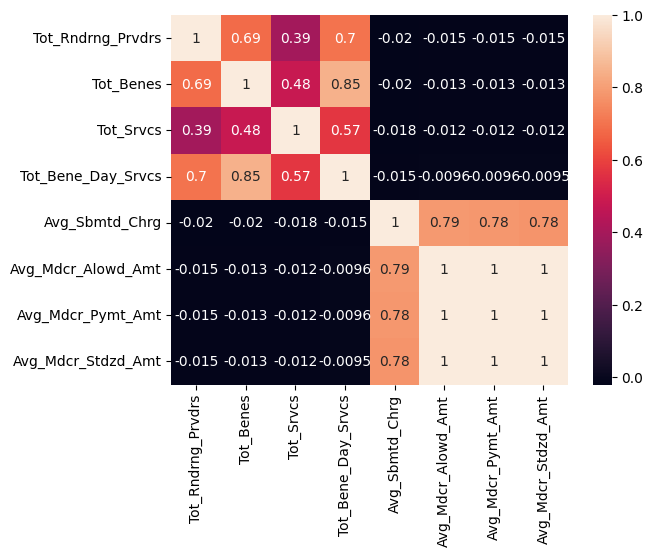

In [73]:
sns.heatmap(numcols.corr(),annot=True)

In [75]:
numcols = numcols.drop(['Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Stdzd_Amt'],axis = 1)

<Axes: >

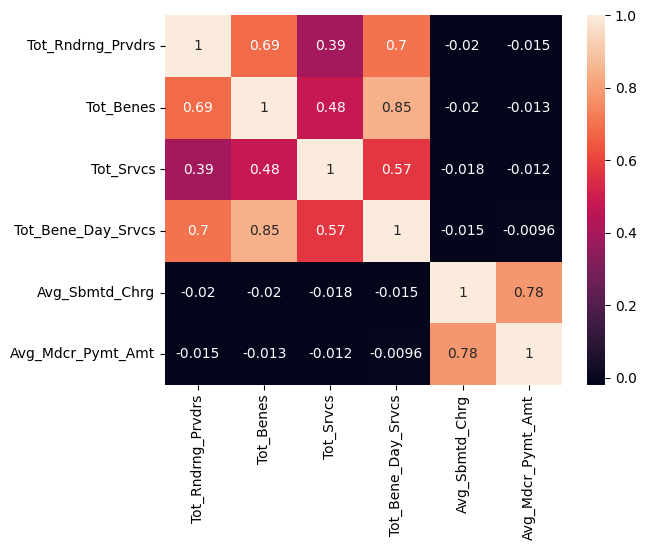

In [77]:
sns.heatmap(numcols.corr(),annot=True)

In [78]:
numcols.head()

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Pymt_Amt
0,279,25735,26341.0,26341,42.415088,20.884538
1,57563,9080086,9346114.7,9345929,44.186609,25.759086
2,187,24576,24649.0,24649,65.965120,31.794918
3,52326,8897346,8994332.2,8994143,53.747218,35.085090
4,211,5364,5371.0,5371,69.139801,38.653349


<Axes: >

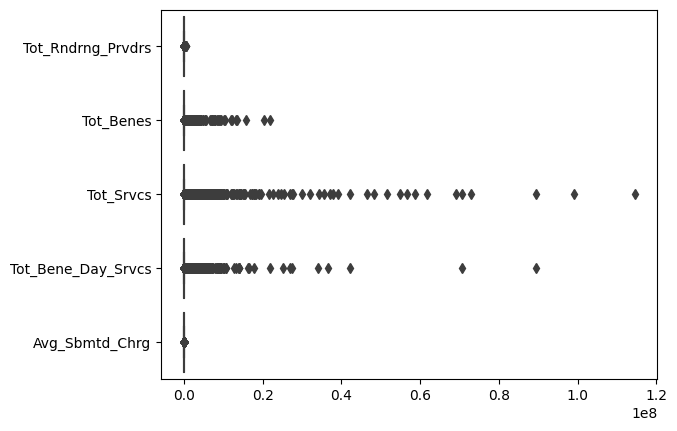

In [80]:
sns.boxplot(numcols.drop('Avg_Mdcr_Pymt_Amt',axis = 1), orient = 'h')

In [81]:
y = numcols.Avg_Mdcr_Pymt_Amt

In [82]:
numcols = numcols.drop('Avg_Mdcr_Pymt_Amt', axis = 1)

In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
robust = RobustScaler()

In [85]:
numcols_robust = robust.fit_transform(numcols)

In [86]:
numcols_robust = pd.DataFrame(numcols_robust, columns=numcols.columns)

In [87]:
numcols_robust

,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg
0,3.012048,46.178378,25.076628,32.994962,-0.270270
1,693.180723,16360.324324,8952.062931,11770.511335,-0.269054
2,1.903614,44.090090,23.455939,30.863980,-0.254107
3,630.084337,16031.063063,8615.106513,11327.455919,-0.262492
4,2.192771,9.473874,4.990421,6.584383,-0.251929
...,...,...,...,...,...
271630,-0.301205,-0.052252,-0.080460,-0.083123,-0.147574
271631,-0.337349,-0.144144,-0.105364,-0.115869,-0.228004
271632,-0.325301,-0.163964,-0.136015,-0.158690,-0.282402
271633,-0.313253,-0.171171,-0.138889,-0.166247,-0.274415


In [88]:
objcols_dummy = pd.get_dummies(objcols)

In [90]:
X = pd.concat([nlp_tfidf,objcols_dummy,numcols_robust], axis = 1)

In [91]:
X.shape

(271635, 371)

<Axes: xlabel='Avg_Mdcr_Pymt_Amt', ylabel='Density'>

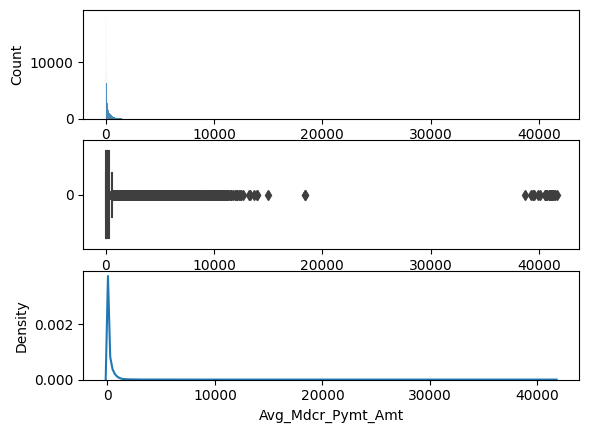

In [94]:
fig,ax = plt.subplots(3,1)
sns.histplot(y, ax = ax[0])
sns.boxplot(y, ax = ax[1], orient = 'h')
sns.kdeplot(y, ax = ax[2])

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Avg_Mdcr_Pymt_Amt', ylabel='Density'>

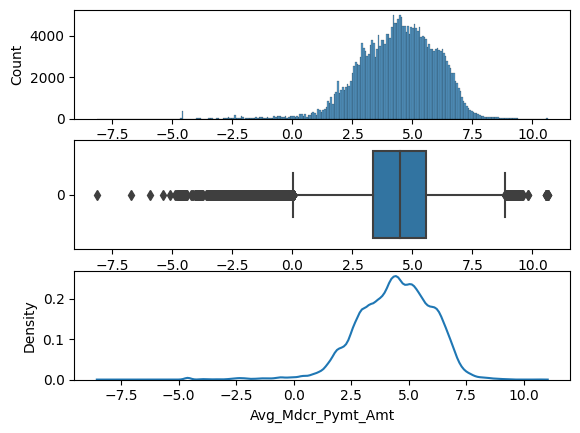

In [97]:
fig,ax = plt.subplots(3,1)
sns.histplot(np.log(y), ax = ax[0])
sns.boxplot(np.log(y), ax = ax[1], orient = 'h')
sns.kdeplot(np.log(y), ax = ax[2])

In [105]:
y_log = np.log(y)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [107]:
y_log = pd.DataFrame(y_log)

In [108]:
y_log = y_log[np.isfinite(y_log).all(1)]

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lr = LinearRegression()

In [102]:
lrmodel = lr.fit(X,y)

In [103]:
lrmodel.score(X,y)

0.6423733131701652

In [122]:
#lrmodel2 = lr.fit(X,y_log)

In [123]:
y_pred = lrmodel.predict(X)

In [124]:
regresid = y - y_pred

In [125]:
np.sqrt(np.mean(regresid**2)) # RMSE

380.83795073201156

In [126]:
from sklearn.tree import DecisionTreeRegressor

In [133]:
dr = DecisionTreeRegressor(max_depth=14)

In [134]:
drmodel = dr.fit(X,y)

In [135]:
drmodel.score(X,y)

0.9309499198838068

In [136]:
drmodelpred = drmodel.predict(X)

In [137]:
drresid = y - drmodelpred

In [138]:
np.sqrt(np.mean(drresid**2)) # RMSE

167.34292406132536